# Preparing Predicting Data & Correlation Analysis

In [9]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import prediction_prep as prep
from os import listdir
from os.path import isfile, join
import re

import warnings
warnings.filterwarnings('ignore')

sns.set_style("white")
sns.set(font_scale=1.2) 

from statsmodels.tsa.stattools import grangercausalitytests

## 1. Prepare Prediction Data

### 1.1 Ellyn USE THESE CELLS TO GET LAG DF

In [2]:
#DV: DIR (classf), SD (reg), Close (reg) 
# READ IN ALL DATA
comments = pd.read_csv('comments_preprocessed_assigned.csv')
sentiment = pd.read_csv('df_pred_id_body.csv')
fin_data = pd.read_csv('AMC_2021.csv')

# Call function to get regression df
df = prep.get_regression_df(ticker_name = 'amc', #
                           comments = comments, 
                           fin_data = fin_data,
                           sentiment = sentiment)
df.head()

In [14]:
## DAILY%CHANGE ##
dep_var = ['Daily%Change'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Volume', 'Low', '2Dir', '3Dir', 'Close', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', 'SD_log', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Daily%Change,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),SD_log(t-1),4Dir(t-1),Daily%Change(t-1)
0,-5.188675,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.492536,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,-0.238123,0.0,-5.188675
2,1.515150,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,-0.203684,0.0,-1.492536
3,1.990048,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.918517,0.0,1.515150
4,4.390251,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.340681,0.0,1.990048


In [15]:
## SD ##
## DAILY%CHANGE ##
dep_var = ['SD_log'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Daily%Change', 'Volume', 'Low', '3Dir', '2Dir', 'Close', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,SD_log,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,7D%Change(t-1),3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),4Dir(t-1),SD_log(t-1)
0,-0.238123,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.203684,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,0.0,-0.238123
2,0.918517,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,0.0,-0.203684
3,0.340681,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,NaN,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.0,0.918517
4,0.345258,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,NaN,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.0,0.340681


In [16]:
## CLOSE PRICE ##
dep_var = ['Close'] # SET YOUR DEP VAR HERE AND REMOVE IT FROM fin_vars IF NOT YOU WILL GET AN ERROR
other_var = ['day_of_week']
sentiment_vars = [i for i in df.columns if 'comment' in i] +['is_meme']
fin_vars = list(set(df.columns) - set(dep_var+other_var+sentiment_vars+['date'])) # catch all
print('Check that these are all just independent financial vars: '+str(fin_vars))
shift = 1

pred_lag = prep.lag_pred_df(df = df,
                       dep_var = dep_var,
                       other_var = other_var, 
                       fin_vars = fin_vars, 
                       sentiment_vars = sentiment_vars, 
                       shift = shift)

pred_lag.head()

Check that these are all just independent financial vars: ['Daily%Change', 'Volume', 'Low', '2Dir', '3Dir', '6D%Change', 'Dir', '4D%Change', '5Dir', 'Open', '7D%Change', '3D%Change', 'SD', 'High', '7Dir', '6Dir', '5D%Change', '2D%Change', 'SD_log', '4Dir']
Length of dataframe before dropping weekends: 366
Length of dataframe after dropping weekends: 250


,Close,day_of_week,comments_neutral(t-1),comments_positive(t-1),comment_count(t-1),pct_pos_comments(t-1),comments_neutral_rollsum_3D(t-1),comments_neutral_rollmean_3D(t-1),comments_neutral_3D_pctchg(t-1),comments_positive_rollsum_3D(t-1),...,3D%Change(t-1),SD(t-1),High(t-1),7Dir(t-1),6Dir(t-1),5D%Change(t-1),2D%Change(t-1),SD_log(t-1),4Dir(t-1),Close(t-1)
0,2.01,0,3.0,1.0,4.0,24.999375,44.0,14.666667,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.98,1,0.0,0.0,0.0,0.000000,10.0,3.333333,-100.0,2.0,...,NaN,0.788105,2.20,0.0,0.0,NaN,NaN,-0.238123,0.0,2.01
2,2.01,2,0.0,0.0,0.0,0.000000,3.0,1.000000,-100.0,1.0,...,NaN,0.815720,2.03,0.0,0.0,NaN,-6.603768,-0.203684,0.0,1.98
3,2.05,3,0.0,0.0,0.0,0.000000,0.0,0.000000,-100.0,0.0,...,-5.188675,2.505572,2.23,0.0,0.0,NaN,0.000000,0.918517,0.0,2.01
4,2.14,4,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.0,...,1.990048,1.405905,2.11,0.0,0.0,NaN,3.535350,0.340681,0.0,2.05


## 2. Correlation and Time Series Tests

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 

If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In [2]:
# Check comments and meme period for all stocks
# Get list of files
# get filenames of all tagged data files
mypath = './stock_data/'
all_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
if '.DS_Store' in all_files:
    all_files.remove('.DS_Store') # remove this line if the file is not in your path. seems to be a mac thing
print(all_files)

all_tickers = []
for i in all_files:
    match = re.search('^[A-Z]*', i)
    all_tickers.append(match[0].lower())

print(all_tickers)

['BB_2021.csv', 'WISH_2021.csv', 'FB_2021.csv', 'NOK_2021.csv', 'TSLA_2021.csv', 'PLTR_2021.csv', 'META_2021.csv', 'AMZN_2021.csv', 'AMC_2021.csv', 'CLOV_2021.csv']
['bb', 'wish', 'fb', 'nok', 'tsla', 'pltr', 'meta', 'amzn', 'amc', 'clov']


In [3]:
# For file, ticker
comment_count_2021 = []
meme_days_2021 = []
for file, ticker in zip(all_files, all_tickers):
    comments = pd.read_csv('comments_preprocessed_assigned.csv')
    sentiment = pd.read_csv('df_pred_id_body.csv')
    fin_data = pd.read_csv(mypath+file)
    
    # Call function to get regression df
    df = prep.get_regression_df(ticker_name = ticker, 
                               comments = comments, 
                               fin_data = fin_data,
                               sentiment = sentiment)
    
    comment_count = sum(df['comment_count'])
    meme_days = sum(df['is_meme'])
    
    comment_count_2021.append(comment_count)
    meme_days_2021.append(meme_days)

In [4]:
df_for_report = pd.DataFrame.from_dict({'ticker': all_tickers,
                                       'comment_count': comment_count_2021,
                                       'meme_days': meme_days_2021})
df_for_report

,ticker,comment_count,meme_days
0,bb,191964.0,14
1,wish,62550.0,21
2,fb,1989.0,22
3,nok,27000.0,16
4,tsla,51175.0,26
5,pltr,57065.0,25
6,meta,3202.0,18
7,amzn,11314.0,24
8,amc,232100.0,20
9,clov,127854.0,22


### 2.1 Check distributions of variables

In [2]:
# Check meme period graph
ticker = 'amc'

ax = sns.lineplot(x = 'date', y = 'comment_count', data = df, legend='auto')
ax2 = ax.twinx()
sns.lineplot(x = 'date', y = 'is_meme', data = df, legend='auto', color = 'red', linestyle="dashed", linewidth = 0.8)
ax.figure.legend()
plt.ylim(0,2)
plt.show()

NameError: name 'df' is not defined

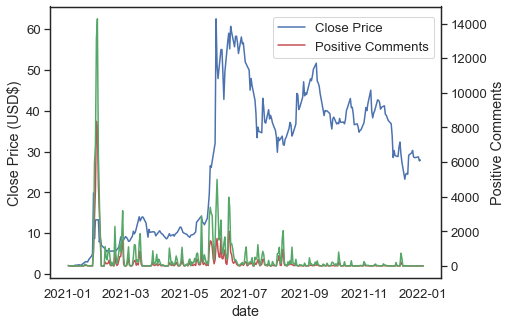

In [25]:
sns.set_style("white")
fig = plt.figure(figsize = (7,5))
ax = sns.lineplot(x = 'date', y = 'Close', data = df)
plt.ylabel('Close Price (USD$)')
ax2 = plt.twinx()
sns.lineplot(x = 'date', y = 'comments_positive', data = df, ax=ax2, color="r")
sns.lineplot(x = 'date', y = 'comments_neutral', data = df, ax=ax2, color="g")
plt.ylabel('Positive Comments')
fig.legend(labels = ['Close Price', 'Positive Comments'],
          bbox_to_anchor=(0.9, 0.87))
plt.show()

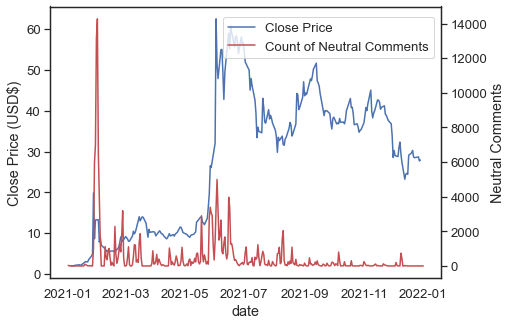

In [21]:
sns.set_style("white")
fig = plt.figure(figsize = (7,5))
ax = sns.lineplot(x = 'date', y = 'Close', data = df)
plt.ylabel('Close Price (USD$)')
ax2 = plt.twinx()
sns.lineplot(x = 'date', y = 'comments_neutral', data = df, ax=ax2, color="r")
plt.ylabel('Neutral Comments')
fig.legend(labels = ['Close Price', 'Count of Neutral Comments'],
          bbox_to_anchor=(0.9, 0.87))
plt.show()

### 2.2 Distribution of Y Vars

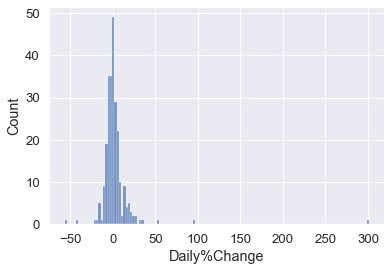

In [21]:
# Check distribution of y variable
sns.histplot(df['Daily%Change'])
plt.show()

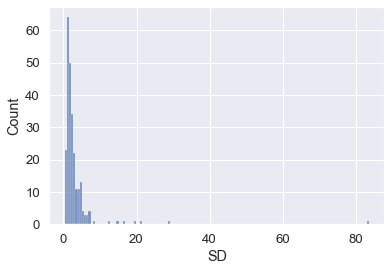

In [22]:
# Check distribution of y variable
# Need to log transform SD
sns.histplot(df['SD'])
plt.show()

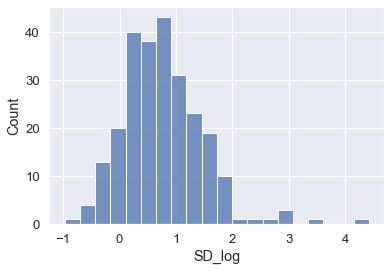

In [23]:
sns.histplot(df['SD_log'])
plt.show()

0.0    128
1.0    122
Name: Dir, dtype: int64


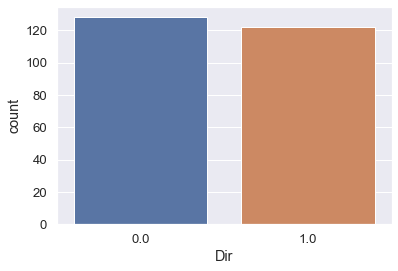

In [24]:
sns.countplot(df['Dir'])
print(df['Dir'].value_counts())
plt.show()

### 2.3  Granger Causality Test

In [10]:
# Get list of files
# get filenames of all tagged data files
mypath = './stock_data/'
all_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
if '.DS_Store' in all_files:
    all_files.remove('.DS_Store') # remove this line if the file is not in your path. seems to be a mac thing
print(all_files)

all_tickers = []
for i in all_files:
    match = re.search('^[A-Z]*', i)
    all_tickers.append(match[0].lower())

print(all_tickers)

all_dep_vars = ['Daily%Change', 'SD', 'Close']
all_indep_vars = ['comment_count', 'comments_positive', 'comment_count_rollmean_3D', 'comments_positive_rollmean_3D']

['BB_2021.csv', 'WISH_2021.csv', 'FB_2021.csv', 'NOK_2021.csv', 'TSLA_2021.csv', 'PLTR_2021.csv', 'META_2021.csv', 'AMZN_2021.csv', 'AMC_2021.csv', 'CLOV_2021.csv']
['bb', 'wish', 'fb', 'nok', 'tsla', 'pltr', 'meta', 'amzn', 'amc', 'clov']


In [11]:
# Run for loop to get data

# For file, ticker
results = []

for file, ticker in zip(all_files, all_tickers):
    comments = pd.read_csv('comments_preprocessed_assigned.csv')
    sentiment = pd.read_csv('df_pred_id_body.csv')
    fin_data = pd.read_csv(mypath+file)

    # Call function to get regression df
    df = prep.get_regression_df(ticker_name = ticker, 
                               comments = comments, 
                               fin_data = fin_data,
                               sentiment = sentiment)
    
    # For all 3 variables
    for dep_var in all_dep_vars:
        
        for indep_var in all_indep_vars:
            test_df = df[[dep_var, indep_var]].dropna()
            gct = pd.DataFrame(grangercausalitytests(test_df, maxlag = [1, 2, 3, 4, 5, 6, 7], verbose = None))

            for lag in range(7):
                ssr_ftest = gct.iloc[0,lag]['ssr_ftest'][1]
                ssr_chi2test = gct.iloc[0,lag]['ssr_chi2test'][1]
                pretty_result = [ticker, dep_var, indep_var, lag, ssr_ftest, ssr_chi2test]
                
                results.append(pretty_result)

In [12]:
gct_results_df = pd.DataFrame(results)
gct_results_df.columns = ['ticker', 'y_var', 'x_var', 'lag', 'ssr_ftest', 'ssr_chi2test']

In [13]:
gct_results_df.to_csv('Granger_Causality_Results.csv', index = False)

In [14]:
# Lag subset
subset = gct_results_df[['ticker', 'ssr_ftest','lag']]

In [15]:
# Find minimum within a window
best_results = gct_results_df.groupby(['ticker', 'y_var', 'x_var'])[['ssr_ftest']].min().reset_index()
best_results = best_results.merge(subset, on = ['ticker', 'ssr_ftest'], how = 'left')
best_results.to_csv('Granger_Causality_Results_best.csv', index = False)

### For Debugging

In [28]:
from statsmodels.tsa.stattools import grangercausalitytests

In [76]:
chg_test = df[['Daily%Change', 'comments_neutral_rollmean_3D']].dropna()
results = pd.DataFrame(grangercausalitytests(chg_test, maxlag = [1, 2, 3, 4, 5, 6, 7], verbose = None))

In [77]:
# Get p-value for the first test 
results.iloc[0,0]['ssr_ftest'][1]

0.4430127906027046

In [78]:
results.iloc[0,0]

{'ssr_ftest': (0.5904022076220037, 0.4430127906027046, 242.0, 1),
 'ssr_chi2test': (0.5977212432536814, 0.43944879821312643, 1),
 'lrtest': (0.5969933031269647, 0.43972752210317945, 1),
 'params_ftest': (0.5904022076219764, 0.44301279060271503, 242.0, 1.0)}

In [159]:
sd_test = df[['SD_log', 'comment_count']].dropna()
grangercausalitytests(sd_test, maxlag = [1, 2, 3, 4, 5])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5702 , p=0.0005  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=12.7235 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4091 , p=0.0004  , df=1
parameter F test:         F=12.5702 , p=0.0005  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5318  , p=0.0816  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=5.1678  , p=0.0755  , df=2
likelihood ratio test: chi2=5.1147  , p=0.0775  , df=2
parameter F test:         F=2.5318  , p=0.0816  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1438  , p=0.0954  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=6.6189  , p=0.0851  , df=3
likelihood ratio test: chi2=6.5318  , p=0.0884  , df=3
parameter F test:         F=2.1438  , p=0.0954  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5039  , p=0.2017  

{1: ({'ssr_ftest': (12.570171972385104, 0.0004690728617877039, 246.0, 1),
   'ssr_chi2test': (12.72346675253614, 0.000361095775983044, 1),
   'lrtest': (12.409059291784843, 0.00042725604185840427, 1),
   'params_ftest': (12.570171972360798, 0.00046907286179349525, 246.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5317971599382605, 0.08161196585694051, 243.0, 2),
   'ssr_chi2test': (5.167783503413075, 0.07547968349605949, 2),
   'lrtest': (5.114677268024934, 0.07751075066289108, 2),
   'params_ftest': (2.531797159936223, 0.08161196585710459, 243.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.143775742032466, 0.0953571947493145, 240.0, 3),
   'ssr_chi2test': (6.618907603525239, 0.08508920907154054, 3),
   'lrtest': (6.531776668170835, 0.08841769955764656, 3),
   'params_ftest': (2.143775742032562, 0.09535719474930349, 240.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [166]:
dir_test = df[['Dir', 'comment_count_mean_rolling_3D']].dropna()
grangercausalitytests(dir_test, maxlag = [1, 2, 3, 4, 5])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0167  , p=0.8974  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0169  , p=0.8967  , df=1
likelihood ratio test: chi2=0.0169  , p=0.8967  , df=1
parameter F test:         F=0.0167  , p=0.8974  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0469  , p=0.9542  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=0.0957  , p=0.9533  , df=2
likelihood ratio test: chi2=0.0957  , p=0.9533  , df=2
parameter F test:         F=0.0469  , p=0.9542  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4386  , p=0.0652  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=7.5291  , p=0.0568  , df=3
likelihood ratio test: chi2=7.4166  , p=0.0597  , df=3
parameter F test:         F=2.4386  , p=0.0652  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8941  , p=0.1122  

{1: ({'ssr_ftest': (0.016661589609770943, 0.8973999933555123, 246.0, 1),
   'ssr_chi2test': (0.01686477972696327, 0.896673657582463, 1),
   'lrtest': (0.01686420862677096, 0.8966753972795408, 1),
   'params_ftest': (0.016661589611362163, 0.897399993350578, 246.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.04689071546323657, 0.9542003019270571, 243.0, 2),
   'ssr_chi2test': (0.09571108999903431, 0.9532714819642952, 2),
   'lrtest': (0.09569262577241489, 0.9532802827152563, 2),
   'params_ftest': (0.046890715463201574, 0.9542003019270828, 243.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.438564005815325, 0.06516719801227237, 240.0, 3),
   'ssr_chi2test': (7.529066367954816, 0.05681629730135421, 3),
   'lrtest': (7.416595526994286, 0.059740643929045587, 3),
   'params_ftest': (2.4385640058164095, 0.06516719801218189, 240.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0